In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
binning_map = {
    'EB': {
        'xbins': 171,
        'ybins': 360,
        'xrange': [-85.0, 86.0],
        'yrange': [1.0, 361.0],
        'half_binx': 0.5,
        'half_biny': 0.5,
        'centers_x': np.linspace(-84.5, 85.5, 171),
        'centers_y': np.linspace(1.5, 360.5, 360)
    },
    'EEP':{
        'xbins': 100,
        'ybins': 100,
        'xrange': [1.0, 101.0],
        'yrange': [1.0, 101.0],
        'half_binx': 0.5,
        'half_biny': 0.5,
        'centers_x': np.linspace(1.5, 100.5, 100),
        'centers_y': np.linspace(1.5, 100.5, 100)
    },
    'EEM':{
        'xbins': 100,
        'ybins': 100,
        'xrange': [1.0, 101.0],
        'yrange': [1.0, 101.0],
        'half_binx': 0.5,
        'half_biny': 0.5,
        'centers_x': np.linspace(1.5, 100.5, 100),
        'centers_y': np.linspace(1.5, 100.5, 100)
    }
}

In [3]:
def plot_corrections(filename, start_run, end_run):
    
    runs = [start_run, end_run]
    
    with open(filename, 'r') as f:
        lines = f.readlines()

    lines = [ l.strip('\r\n').split('\t') for l in lines ]

    eb_corrections = []
    eep_corrections = []
    eem_corrections = []

    eb_ix = []
    eb_iy = []
    eep_ix = []
    eep_iy = []
    eem_ix = []
    eem_iy = []

    for l in lines:
        if l[2]=='0':
            eb_corrections.append(float(l[3]))
            eb_ix.append(int(l[0]))
            eb_iy.append(int(l[1]))
        elif l[2]=='1':
            eep_corrections.append(float(l[3]))
            eep_ix.append(int(l[0]))
            eep_iy.append(int(l[1]))
        elif l[2]=='-1':
            eem_corrections.append(float(l[3]))
            eem_ix.append(int(l[0]))
            eem_iy.append(int(l[1]))
    
    eb_corrections = np.array(eb_corrections)
    eep_corrections = np.array(eep_corrections)
    eem_corrections = np.array(eem_corrections)
    
    eb_corrections = eb_corrections[~np.isnan(eb_corrections)]
    eep_corrections = eep_corrections[~np.isnan(eep_corrections)]
    eem_corrections = eem_corrections[~np.isnan(eem_corrections)]

    plt.clf()
    plt.figure(figsize=(6.6,6.6))
    h1 = plt.hist(eb_corrections, histtype='step', bins=50, range=(-4, 4), label='EB', color='tab:blue', linewidth=2, density=True)
    h2 = plt.hist(eep_corrections, histtype='step', bins=50, range=(-4, 4), label='EE+', color='tab:orange', linewidth=2, density=True)
    h3 = plt.hist(eem_corrections, histtype='step', bins=50, range=(-4, 4), label='EE-', color='tab:green', linewidth=2, density=True)
    plt.xlabel('Time (ns)', fontsize=14)
    plt.ylabel('a.u.', fontsize=14)
    plt.title('Average Time/ crystal ({}-{})'.format(runs[0],runs[1]), fontsize=16)
    plt.legend(loc='upper left', fontsize=14)
    maxy = max(np.concatenate((h1[0],h2[0],h3[0])))
    plt.text(x=-4, y=maxy*0.5, s='EB (mean)={:.2f} ns'.format(np.mean(np.array(eb_corrections)[~np.isnan(eb_corrections)])))
    plt.text(x=-4, y=maxy*0.5*(1.75/2), s='EE+ (mean)={:.2f} ns'.format(np.mean(np.array(eep_corrections)[~np.isnan(eep_corrections)])))
    plt.text(x=-4, y=maxy*0.5*(1.5/2), s='EE- (mean)={:.2f} ns'.format(np.mean(np.array(eem_corrections)[~np.isnan(eem_corrections)])))
    plt.savefig(filename.replace('.dat','.png'))
    #plt.yscale('log')
    print('{:0.2f} {:0.2f} {:0.2f}'.format(np.mean(eb_corrections), np.mean(eep_corrections), np.mean(eem_corrections)))
    return h1, h2, h3

In [4]:
def plot_2d_map(filename='/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022F/Calibration/360486_360491_tCut_10/ecalTiming-corr.dat',
                start_run=360486,
                end_run=360491):
    average_time_map = {}
    runs = [start_run, end_run]

    with open(filename, 'r') as f:
        lines = f.readlines()

    lines = [ l.strip('\r\n').split('\t') for l in lines ]

    eb_corrections = []
    eep_corrections = []
    eem_corrections = []

    eb_ix = []
    eb_iy = []
    eep_ix = []
    eep_iy = []
    eem_ix = []
    eem_iy = []

    for l in lines:
        if l[2]=='0':
            eb_corrections.append(float(l[3]))
            eb_ix.append(int(l[0]))
            eb_iy.append(int(l[1]))
        elif l[2]=='1':
            eep_corrections.append(float(l[3]))
            eep_ix.append(int(l[0]))
            eep_iy.append(int(l[1]))
        elif l[2]=='-1':
            eem_corrections.append(float(l[3]))
            eem_ix.append(int(l[0]))
            eem_iy.append(int(l[1]))

    D = {'EB': (eb_ix, eb_iy, eb_corrections),
        'EEM': (eem_ix, eem_iy, eem_corrections),
        'EEP': (eep_ix, eep_iy, eep_corrections)}  

    for region in ['EB','EEP','EEM']:

        zpos = 0
        if region=='EEP': zpos = 1
        elif region=='EEM': zpos = -1

        xbins = binning_map[region]['xbins']
        ybins = binning_map[region]['ybins']
        xrange = binning_map[region]['xrange']
        yrange = binning_map[region]['yrange']
        half_binx = binning_map[region]['half_binx']
        half_biny = binning_map[region]['half_biny']

        Ax = D[region][0]
        Ay = D[region][1]
        T = D[region][2]

        Mx = ((binning_map[region]['centers_x'].reshape(xbins,1))*np.ones(ybins)).flatten() 
        My = ((binning_map[region]['centers_y'].reshape(ybins,1))*np.ones(xbins)).T.flatten()

        unit = ' (ns)'
        cmap_='bwr'

        if region=='EB':
            xlabel_ = 'i$\eta$'
            ylabel_ = 'i$\phi$'
        else:
            xlabel_ = 'ix'
            ylabel_ = 'iy'

        plt.clf()
        plt.figure(figsize=(7.7,6.6))

        fill_time = plt.hist2d(Ax, Ay, weights=T,
                        range=(tuple(xrange), tuple(yrange)), bins=(xbins, ybins), cmap=cmap_)

        plt.xlabel(xlabel_, fontsize=14)
        plt.ylabel(ylabel_, fontsize=14)
        plt.title('Average Time '+region+unit, fontsize=16)

        plt.colorbar()
        plt.clim(-5, 5)       
        plt.savefig(filename.replace('.dat','{}.png'.format(region)))


-0.03 -0.00 -0.01


<Figure size 432x288 with 0 Axes>

<Figure size 554.4x475.2 with 0 Axes>

<Figure size 554.4x475.2 with 0 Axes>

<Figure size 554.4x475.2 with 0 Axes>

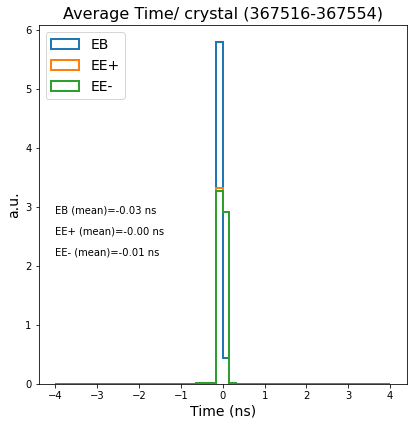

In [7]:
file='/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367516_367554_tCut_10/ecalTiming-corr_validation.dat'
runs = file.split('/')[-2]
runs = runs.split('_')
srun = runs[0]
erun = runs[1]
plot_2d_map(file,srun,erun)
_,__,___ = plot_corrections(file,srun,erun)

0.67 0.49 0.47


<Figure size 432x288 with 0 Axes>

<Figure size 554.4x475.2 with 0 Axes>

<Figure size 554.4x475.2 with 0 Axes>

<Figure size 554.4x475.2 with 0 Axes>

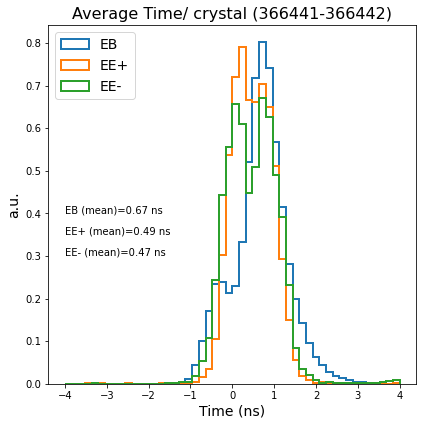

In [12]:
file='/eos/user/b/bjoshi/www/ECAL_timing/Run2023B/Calibration/366441_366442_tCut_10/ecalTiming-corr-with-hw-delay-ccu.dat'
srun = 366441
erun = 366442
plot_2d_map(file,srun,erun)
_,__,___ = plot_corrections(file,srun,erun)

In [55]:
fills=pd.read_csv('fill_list_30_08_2022.csv')

In [59]:
sruns = fills.start_run.to_list()
eruns = fills.end_run.to_list()

In [62]:
path_to_automation_store = '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022A/Calibration/'
for irun, sr in enumerate(sruns):
    p = path_to_automation_store+'{}_{}_Ethresh/'.format(sr, eruns[irun])
    if os.path.exists(p): continue
    print('python3 run_local.py -s {} -e {} --energy-cuts'.format(sr, eruns[irun]))

python3 run_local.py -s 357883 -e 357933 --energy-cuts
python3 run_local.py -s 357786 -e 357871 --energy-cuts
python3 run_local.py -s 357762 -e 357784 --energy-cuts
python3 run_local.py -s 357741 -e 357761 --energy-cuts
python3 run_local.py -s 357731 -e 357735 --energy-cuts
python3 run_local.py -s 357710 -e 357725 --energy-cuts
python3 run_local.py -s 357084 -e 357114 --energy-cuts
python3 run_local.py -s 357072 -e 357083 --energy-cuts
python3 run_local.py -s 356996 -e 357005 --energy-cuts
python3 run_local.py -s 356957 -e 356991 --energy-cuts
python3 run_local.py -s 356939 -e 356956 --energy-cuts
python3 run_local.py -s 356921 -e 356937 --energy-cuts
python3 run_local.py -s 356916 -e 356919 --energy-cuts
python3 run_local.py -s 356891 -e 356915 --energy-cuts
python3 run_local.py -s 356808 -e 356850 --energy-cuts
python3 run_local.py -s 356786 -e 356798 --energy-cuts
python3 run_local.py -s 356715 -e 356727 --energy-cuts
python3 run_local.py -s 356705 -e 356714 --energy-cuts
python3 ru

-0.03 -0.72 -0.79
-0.05 -0.73 -0.80
-0.05 -0.73 -0.81
-0.02 -0.71 -0.78
0.01 -0.67 -0.74
0.04 -0.70 -0.80
0.02 -0.65 -0.72
0.09 -0.58 -0.66
0.06 -0.59 -0.67
0.02 -0.63 -0.71
0.08 -0.58 -0.65
-0.01 -0.63 -0.73
-0.55 -0.05 -0.10
-0.26 -0.32 -0.38
-0.60 -0.11 -0.15
-0.57 -0.07 -0.10
-0.60 -0.10 -0.14
-0.52 -0.01 -0.05
-0.50 0.00 -0.02


/tmp/ipykernel_1420/208578356.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6.6,6.6))


-0.53 -0.01 -0.05
-0.49 0.04 -0.01
-0.43 0.09 0.05
-0.42 0.10 0.05
-0.44 0.13 0.06
-0.49 0.05 0.01
-0.45 0.11 0.06
-0.48 0.07 0.06
-0.44 0.13 0.11
-0.47 0.09 0.07
-0.44 0.13 0.12


<Figure size 432x288 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

<Figure size 475.2x475.2 with 0 Axes>

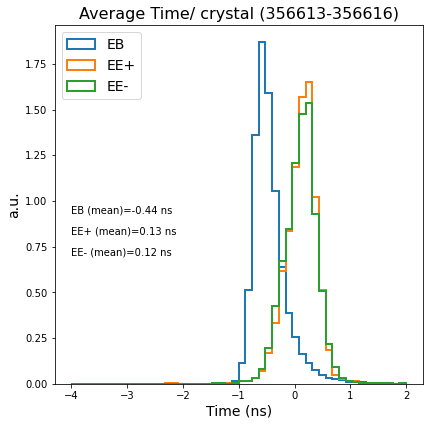

In [70]:
path_to_automation_store = '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022A/Calibration/'
for irun, sr in enumerate(sruns):
    p = path_to_automation_store+'{}_{}_Ethresh_tCut_10/'.format(sr, eruns[irun])
    #print('python3 run_local.py -s {} -e {} --energy-cuts'.format(sr, eruns[irun]))
    filename = p+'/ecalTiming-corr.dat'.format(sr, eruns[irun])
    plot_corrections(filename, sr, eruns[irun])

<Figure size 432x288 with 0 Axes>

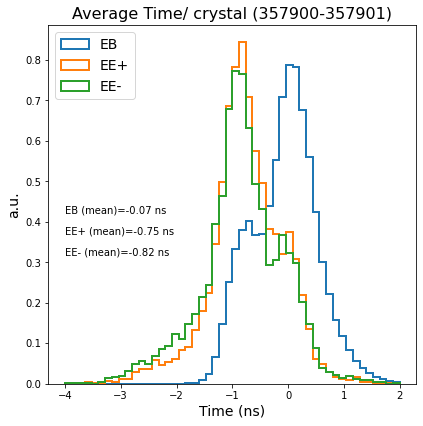

In [22]:
filename='/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022A/Calibration/357900_357901_Ethresh/ecalTiming-corr.dat'
#filename = '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022A/Calibration/357762_357784_Ethresh/ecalTiming-corr.dat'


<Figure size 432x288 with 0 Axes>

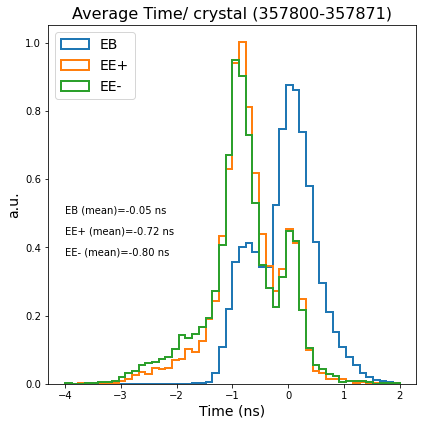

In [20]:
filename = '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022A/Calibration/357800_357871_Ethresh_tCut_3/ecalTiming-corr.dat'
runs = filename.replace('/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022A/Calibration/','')
runs = runs.split('/')[0]
runs = runs.split('_')
#runs = ['357610','357610']

with open(filename, 'r') as f:
    lines = f.readlines()

lines = [ l.strip('\r\n').split('\t') for l in lines ]

eb_corrections = []
eep_corrections = []
eem_corrections = []

eb_ix = []
eb_iy = []
eep_ix = []
eep_iy = []
eem_ix = []
eem_iy = []

for l in lines:
    if l[2]=='0':
        eb_corrections.append(float(l[3]))
        eb_ix.append(int(l[0]))
        eb_iy.append(int(l[1]))
    elif l[2]=='1':
        eep_corrections.append(float(l[3]))
        eep_ix.append(int(l[0]))
        eep_iy.append(int(l[1]))
    elif l[2]=='-1':
        eem_corrections.append(float(l[3]))
        eem_ix.append(int(l[0]))
        eem_iy.append(int(l[1]))

plt.clf()
plt.figure(figsize=(6.6,6.6))
h1 = plt.hist(eb_corrections, histtype='step', bins=50, range=(-4, 2), label='EB', color='tab:blue', linewidth=2, density=True)
h2 = plt.hist(eep_corrections, histtype='step', bins=50, range=(-4, 2), label='EE+', color='tab:orange', linewidth=2, density=True)
h3 = plt.hist(eem_corrections, histtype='step', bins=50, range=(-4, 2), label='EE-', color='tab:green', linewidth=2, density=True)
plt.xlabel('Time (ns)', fontsize=14)
plt.ylabel('a.u.', fontsize=14)
plt.title('Average Time/ crystal ({}-{})'.format(runs[0],runs[1]), fontsize=16)
plt.legend(loc='upper left', fontsize=14)
maxy = max(np.concatenate((h1[0],h2[0],h3[0])))
plt.text(x=-4, y=maxy*0.5, s='EB (mean)={:.2f} ns'.format(np.mean(np.array(eb_corrections)[~np.isnan(eb_corrections)])))
plt.text(x=-4, y=maxy*0.5*(1.75/2), s='EE+ (mean)={:.2f} ns'.format(np.mean(np.array(eep_corrections)[~np.isnan(eep_corrections)])))
plt.text(x=-4, y=maxy*0.5*(1.5/2), s='EE- (mean)={:.2f} ns'.format(np.mean(np.array(eem_corrections)[~np.isnan(eem_corrections)])))
plt.show()

<Figure size 432x288 with 0 Axes>

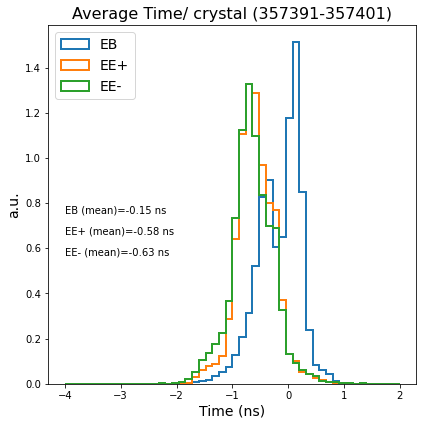

In [30]:
filename = '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022A/Calibration/357391_357401_repr/ecalTiming-corr_2022_08_23.dat'
runs = filename.replace('/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022A/Calibration/','')
runs = runs.split('/')[0]
runs = runs.split('_')
#runs = ['357610','357610']

with open(filename, 'r') as f:
    lines = f.readlines()

lines = [ l.strip('\r\n').split('\t') for l in lines ]

eb_corrections = []
eep_corrections = []
eem_corrections = []

eb_ix = []
eb_iy = []
eep_ix = []
eep_iy = []
eem_ix = []
eem_iy = []

for l in lines:
    if l[2]=='0':
        eb_corrections.append(float(l[3]))
        eb_ix.append(int(l[0]))
        eb_iy.append(int(l[1]))
    elif l[2]=='1':
        eep_corrections.append(float(l[3]))
        eep_ix.append(int(l[0]))
        eep_iy.append(int(l[1]))
    elif l[2]=='-1':
        eem_corrections.append(float(l[3]))
        eem_ix.append(int(l[0]))
        eem_iy.append(int(l[1]))

plt.clf()
plt.figure(figsize=(6.6,6.6))
h1 = plt.hist(eb_corrections, histtype='step', bins=50, range=(-4, 2), label='EB', color='tab:blue', linewidth=2, density=True)
h2 = plt.hist(eep_corrections, histtype='step', bins=50, range=(-4, 2), label='EE+', color='tab:orange', linewidth=2, density=True)
h3 = plt.hist(eem_corrections, histtype='step', bins=50, range=(-4, 2), label='EE-', color='tab:green', linewidth=2, density=True)
plt.xlabel('Time (ns)', fontsize=14)
plt.ylabel('a.u.', fontsize=14)
plt.title('Average Time/ crystal ({}-{})'.format(runs[0],runs[1]), fontsize=16)
plt.legend(loc='upper left', fontsize=14)
maxy = max(np.concatenate((h1[0],h2[0],h3[0])))
plt.text(x=-4, y=maxy*0.5, s='EB (mean)={:.2f} ns'.format(np.mean(np.array(eb_corrections)[~np.isnan(eb_corrections)])))
plt.text(x=-4, y=maxy*0.5*(1.75/2), s='EE+ (mean)={:.2f} ns'.format(np.mean(np.array(eep_corrections)[~np.isnan(eep_corrections)])))
plt.text(x=-4, y=maxy*0.5*(1.5/2), s='EE- (mean)={:.2f} ns'.format(np.mean(np.array(eem_corrections)[~np.isnan(eem_corrections)])))
plt.show()

<Figure size 432x288 with 0 Axes>

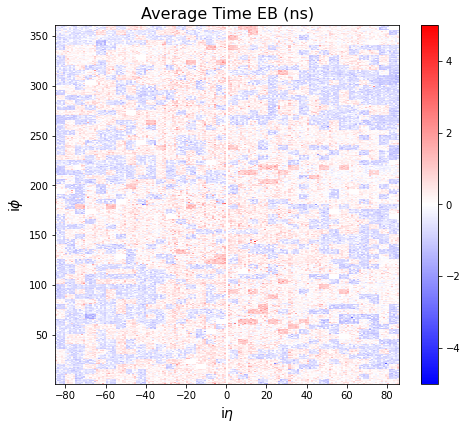

<Figure size 432x288 with 0 Axes>

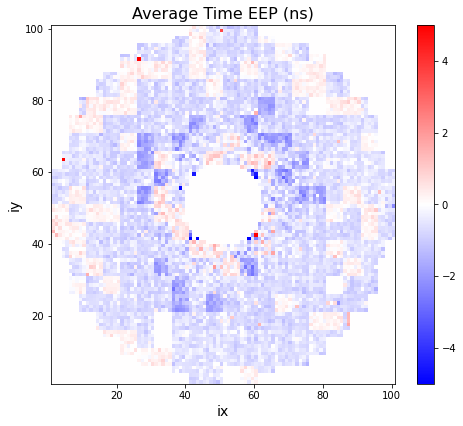

<Figure size 432x288 with 0 Axes>

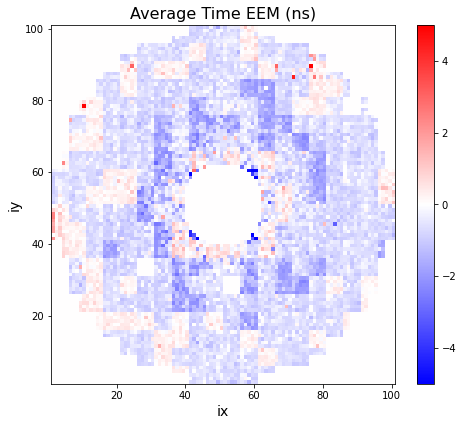

In [4]:
runs = filename.replace('/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022A/Calibration/','')
runs = runs.split('/')[0]
runs = runs.split('_')

with open(filename, 'r') as f:
    lines = f.readlines()

lines = [ l.strip('\r\n').split('\t') for l in lines ]

eb_corrections = []
eep_corrections = []
eem_corrections = []

for l in lines:
    if l[2]=='0': eb_corrections.append(float(l[3]))
    elif l[2]=='1': eep_corrections.append(float(l[3]))
    elif l[2]=='-1': eem_corrections.append(float(l[3]))

plt.clf()
plt.figure(figsize=(6.6,6.6))
h1 = plt.hist(eb_corrections, histtype='step', bins=50, range=(-4, 2), label='EB', color='tab:blue', linewidth=2, density=True)
h2 = plt.hist(eep_corrections, histtype='step', bins=50, range=(-4, 2), label='EE+', color='tab:orange', linewidth=2, density=True)
h3 = plt.hist(eem_corrections, histtype='step', bins=50, range=(-4, 2), label='EE-', color='tab:green', linewidth=2, density=True)
plt.xlabel('Time (ns)', fontsize=14)
plt.ylabel('a.u.', fontsize=14)
plt.title('Average Time/ crystal ({}-{})'.format(runs[0],runs[1]), fontsize=16)
plt.legend(loc='upper left', fontsize=14)
maxy = max(np.concatenate((h1[0],h2[0],h3[0])))
plt.text(x=-4, y=maxy*0.5, s='EB (mean)={:.2f} ns'.format(np.mean(np.array(eb_corrections)[~np.isnan(eb_corrections)])))
plt.text(x=-4, y=maxy*0.5*(1.75/2), s='EE+ (mean)={:.2f} ns'.format(np.mean(np.array(eep_corrections)[~np.isnan(eep_corrections)])))
plt.text(x=-4, y=maxy*0.5*(1.5/2), s='EE- (mean)={:.2f} ns'.format(np.mean(np.array(eem_corrections)[~np.isnan(eem_corrections)])))
plt.show()

NameError: name 'plt' is not defined

In [2]:
import xml.etree.ElementTree as ET

In [3]:
def compare_xml_files(old_xml_file, new_xml_file):
    tree = ET.parse(old_xml_file)
    root=tree.getroot()
    eb_crystals_old = []
    ee_crystals_old = []

    for i in range(61200): eb_crystals_old.append(float(root[0][0][0][i+1].text))
    for i in range(14648): ee_crystals_old.append(float(root[0][1][0][i+1].text))

    tree = ET.parse(new_xml_file)
    root=tree.getroot()
    eb_crystals_new = []
    ee_crystals_new = []
    for i in range(61200): eb_crystals_new.append(float(root[0][0][0][i+1].text))
    for i in range(14648): ee_crystals_new.append(float(root[0][1][0][i+1].text))

    plt.hist(np.array(eb_crystals_old)-np.array(eb_crystals_new), range=(-4, 4), bins=200)
    plt.title('Difference in average EB Time Corrections', fontsize=16)
    plt.show()

    plt.hist(np.array(ee_crystals_old)-np.array(ee_crystals_new), range=(-4, 4), bins=200)
    plt.title('Difference in average EE Time Corrections', fontsize=16)
    plt.show()

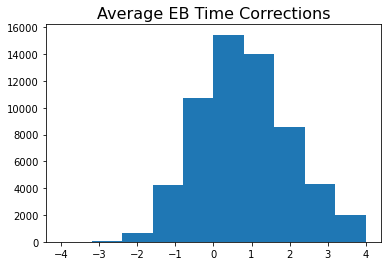

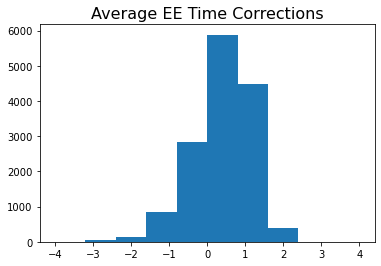

In [158]:
old_xml_file = '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022D/Calibration/357898_357900/ecalTiming-abs_2022_08_23.xml'
tree = ET.parse(old_xml_file)
root=tree.getroot()
eb_crystals_old = []
ee_crystals_old = []

for i in range(61200): eb_crystals_old.append(float(root[0][0][0][i+1].text))
for i in range(14648): ee_crystals_old.append(float(root[0][1][0][i+1].text))

plt.hist(np.array(eb_crystals_old), range=(-4, 4), bins=10)
plt.title('Average EB Time Corrections', fontsize=16)
plt.show()

plt.hist(np.array(ee_crystals_old), range=(-4, 4), bins=10)
plt.title('Average EE Time Corrections', fontsize=16)
plt.show()

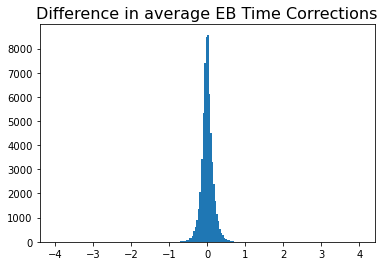

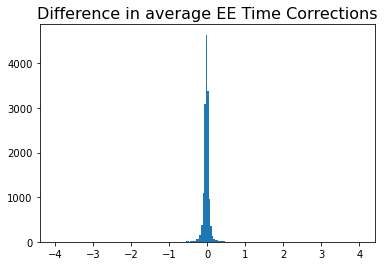

In [143]:
# compare xml files and amke plots
old_xml_file = '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022A/Calibration/357883_357933_tCut_10/ecalTiming-abs_2022_09_14.xml'
new_xml_file = '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022D/Calibration/357898_357900/ecalTiming-abs_2022_08_23.xml'
compare_xml_files(old_xml_file, new_xml_file)

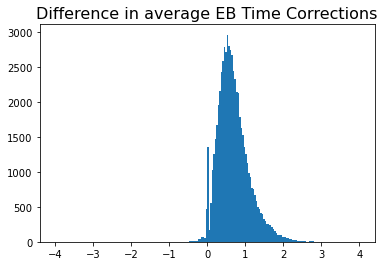

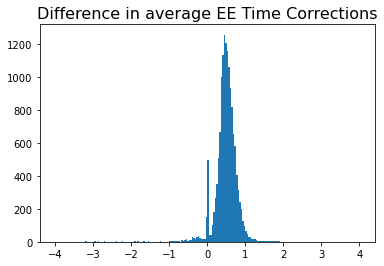

In [147]:
# compare xml files and amke plots
old_xml_file = '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022A/Calibration/356371//ecalTiming-abs_2022_07_29.xml'
new_xml_file = '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022D/Calibration/357898_357900/ecalTiming-abs_2022_08_23.xml'
compare_xml_files(new_xml_file, old_xml_file)

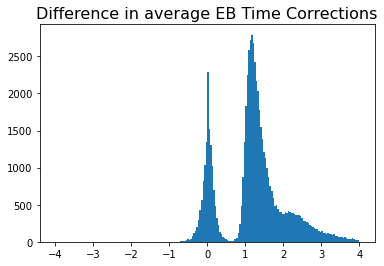

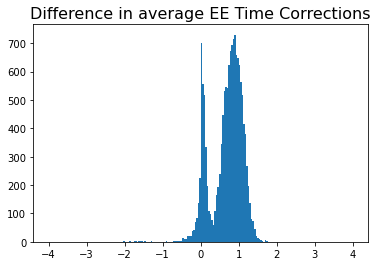

In [11]:
# compare xml files and amke plots
old_xml_file = '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022D/Calibration/357898_357900/ecalTiming-abs_2022_08_23.xml'
new_xml_file = '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022A/Calibration/359759_359764_tCut_10//ecalTiming-abs_2022_10_05.xml'
compare_xml_files(old_xml_file, new_xml_file)

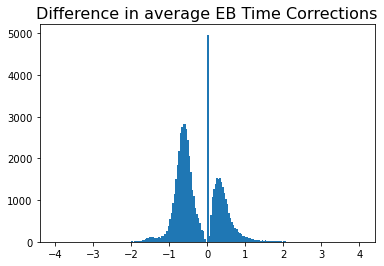

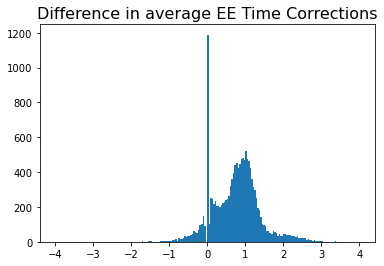

In [171]:
# compare xml files and amke plots
old_xml_file = '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022A/Calibration/356996_357005_tCut_10/ecalTiming-abs_2022_08_09.xml'
new_xml_file = '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022A/Calibration/356996_357005/ecalTiming-abs_2022_08_09.xml'
compare_xml_files(old_xml_file, new_xml_file)   

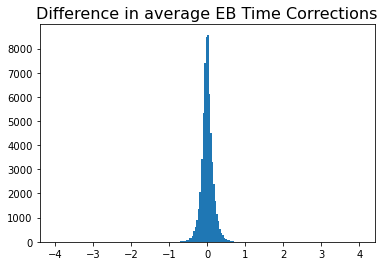

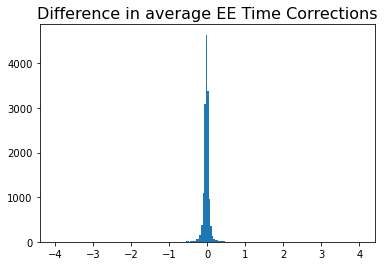

In [172]:
# compare xml files and amke plots
old_xml_file = '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/ecalTiming_validation_2022_09_14.xml'
new_xml_file = '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/ecalTiming_validation_2022_09_29.xml'
compare_xml_files(old_xml_file, new_xml_file)   

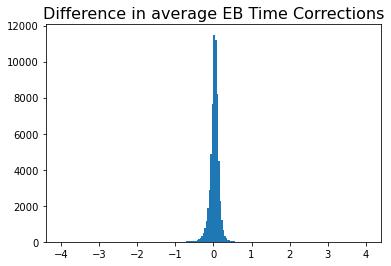

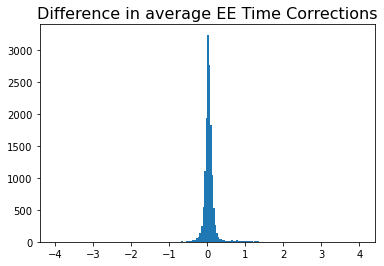

In [7]:
# compare xml files and amke plots
old_xml_file = '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/ecalTiming-abs_2022_11_08.xml'
new_xml_file = '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022A/Calibration/359691_359696_tCut_10/ecalTiming-abs_2022_10_05.xml'
compare_xml_files(old_xml_file, new_xml_file)   